# Chargement des jeu de données

In [2]:
%run preprocessing.ipynb

/tmp/ipykernel_22558/1536755155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordinal.loc[:,"_map"] = ord_enc.fit_transform(df_categoricals[["_map"]])


In [55]:
%run functions.ipynb

<div class="alert alert-block alert-info"><b>Import</b></div>

In [56]:
from sklearn import (
    decomposition,
    discriminant_analysis,
    ensemble,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
    preprocessing,
    svm,
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score as sklearn_metric
from sklearn.inspection import permutation_importance

<div class="alert alert-block alert-info"><b>Classifier</b></div>

In [57]:
model_name = [
    "GaussianNB",
    "LogisticRegression",
    "SVC",
    "KNN",
    "Random Forest",
    "Decision Tree",
    #"MLPClassifier",
    "AdaBoost",
    "QDA"
]

model_list = [
    GaussianNB(),
    LogisticRegression(max_iter=10000),
    SVC(),  
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier(n_estimators=10),
    DecisionTreeClassifier(),
    #MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,),random_state=1,max_iter=1200000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis()
]


In [58]:
def entrainement(model_list,x_train,y_train,x_test,y_test):
    perf_train = []
    perf_test = []
    for i in range(len(model_list)):
        modele = model_list[i]
        modele.fit(x_train,y_train)
        prediction = modele.predict(x_test)
        precision = accuracy_score(y_test,prediction)
        perf_train.append(precision)
        perf_test.append(sklearn_metric(y_test.ravel(), prediction.ravel()))
    return perf_train,perf_test

In [59]:
def analyze_model_experiments(result_df):
    tebad = result_df.perf_te < result_df.perf_te.median()
    trbad = result_df.perf_tr < result_df.perf_tr.median()
    overfitted = tebad & ~trbad
    underfitted = tebad & trbad
    result_df['Overfitted'] = overfitted
    result_df['Underfitted'] = underfitted
    return result_df

In [60]:
def df_performance(model_name,train,test):
    df_performance = pd.DataFrame(columns=['perf_tr', 'perf_te','Overfitted','Underfitted'])
    df_performance['perf_tr'] = train
    df_performance['perf_te'] = test
    
    analyze_model_experiments(df_performance)
    
    df_performance.index = model_name
    df_performance.style.background_gradient(cmap='PuBu')
    return df_performance

<div class="alert alert-block alert-info"><b>Ordinal</b></div>

<div class="alert alert-block alert-warning"><b>Ordinal Non Standardisé</b></div>

In [61]:
train_ord,test_ord = entrainement(model_list,x_train_ordinal,y_train_ordinal,x_test_ordinal,y_test_ordinal)

In [62]:
df_perf = df_performance(model_name,train_ord,test_ord)
df_perf

,perf_tr,perf_te,Overfitted,Underfitted
GaussianNB,0.895769,0.894745,True,False
LogisticRegression,0.920907,0.920204,False,False
SVC,0.806867,0.805659,False,True
KNN,0.783568,0.782152,False,True
Random Forest,0.920907,0.919982,False,False
Decision Tree,0.878602,0.878576,False,True
AdaBoost,0.927039,0.926432,False,False
QDA,0.895156,0.895041,False,False


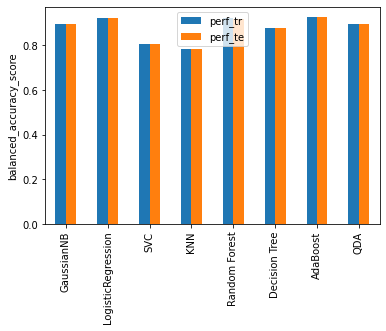

In [63]:
df_perf[['perf_tr', 'perf_te']].plot.bar()
plt.ylabel(sklearn_metric.__name__)
plt.show()

<div class="alert alert-block alert-warning"><b>Ordinal Standardisé</b></div>

In [64]:
train_ord_std,test_ord_std = entrainement(model_list,x_train_ordinal_standard,y_train_ordinal_standard,x_test_ordinal_standard,y_test_ordinal_standard)

In [65]:
df_perf_ord_std = df_performance(model_name,train_ord_std,test_ord_std)
df_perf_ord_std

,perf_tr,perf_te,Overfitted,Underfitted
GaussianNB,0.896383,0.895336,False,True
LogisticRegression,0.919681,0.918976,False,False
SVC,0.518087,0.500000,False,True
KNN,0.904353,0.903473,False,False
Random Forest,0.916616,0.915662,False,False
Decision Tree,0.873084,0.872807,False,True
AdaBoost,0.927039,0.926432,False,False
QDA,0.895156,0.895041,False,True


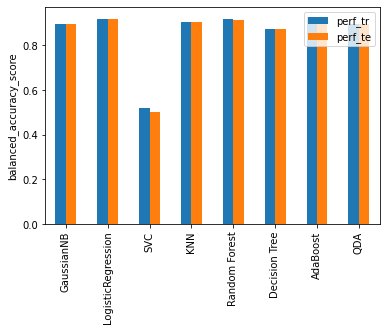

In [66]:
df_perf_ord_std [['perf_tr', 'perf_te']].plot.bar()
plt.ylabel(sklearn_metric.__name__)
plt.show()

<div class="alert alert-block alert-info"><b>One-Hot</b></div>

<div class="alert alert-block alert-warning"><b>One-Hot Non Standardisé</b></div>

In [67]:
train_one_hot,test_one_hot = entrainement(model_list,x_train_one_hot,y_train_one_hot,x_test_one_hot,y_test_one_hot)

/home/alice/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [69]:
df_perf_one_hot = df_performance(model_name,train_one_hot,test_one_hot)
df_perf_one_hot

,perf_tr,perf_te,Overfitted,Underfitted
GaussianNB,0.891478,0.891224,False,False
LogisticRegression,0.918455,0.917748,False,False
SVC,0.804414,0.803292,False,True
KNN,0.782955,0.781560,False,True
Random Forest,0.922134,0.921521,False,False
Decision Tree,0.877989,0.877407,False,True
AdaBoost,0.927039,0.926432,False,False
QDA,0.740037,0.740496,False,True


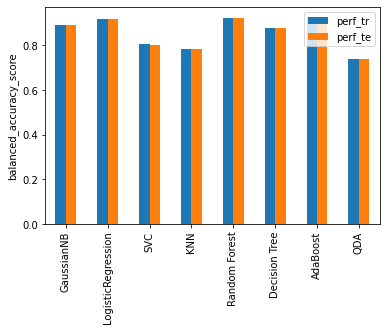

In [70]:
df_perf_one_hot[['perf_tr', 'perf_te']].plot.bar()
plt.ylabel(sklearn_metric.__name__)
plt.show()

<div class="alert alert-block alert-warning"><b>One-Hot Standardisé</b></div>

In [71]:
train_one_hot_standard,test_one_hot_standard = entrainement(model_list,x_train_one_hot_standard,y_train_one_hot_standard,x_test_one_hot_standard,y_test_one_hot_standard)

/home/alice/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [72]:
df_perf_one_hot_std = df_performance(model_name,train_one_hot_standard,test_one_hot_standard)
df_perf_one_hot_std

,perf_tr,perf_te,Overfitted,Underfitted
GaussianNB,0.664010,0.675562,False,True
LogisticRegression,0.917229,0.916432,False,False
SVC,0.518087,0.500000,False,True
KNN,0.891478,0.890469,False,False
Random Forest,0.920294,0.919435,False,False
Decision Tree,0.884733,0.884627,False,True
AdaBoost,0.927039,0.926432,False,False
QDA,0.627836,0.636964,False,True


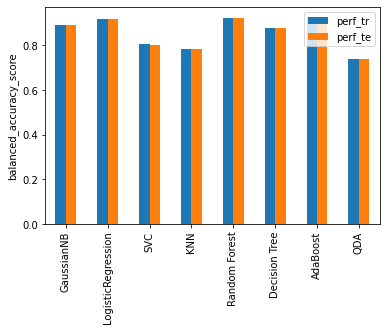

In [73]:
df_perf_one_hot[['perf_tr', 'perf_te']].plot.bar()
plt.ylabel(sklearn_metric.__name__)
plt.show()

<div class="alert alert-block alert-warning"><b>One-Hot Standardisé + Ratio</b></div>

In [74]:
train_one_hot_ratio_std,test_one_hot_ratio_std = entrainement(model_list,x_train_one_hot_ratio_standard,y_train_one_hot_ratio_standard,x_test_one_hot_ratio_standard,y_test_one_hot_ratio_standard)

/home/alice/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [75]:
df_perf_one_hot_ratio_std = df_performance(model_name,train_one_hot_ratio_std,test_one_hot_ratio_std)
df_perf_one_hot_ratio_std

,perf_tr,perf_te,Overfitted,Underfitted
GaussianNB,0.687922,0.698683,False,True
LogisticRegression,0.912324,0.912320,False,False
SVC,0.518087,0.500000,False,True
KNN,0.873697,0.873576,False,False
Random Forest,0.904353,0.903562,False,False
Decision Tree,0.868179,0.867762,False,True
AdaBoost,0.904353,0.904405,False,False
QDA,0.563458,0.577988,False,True


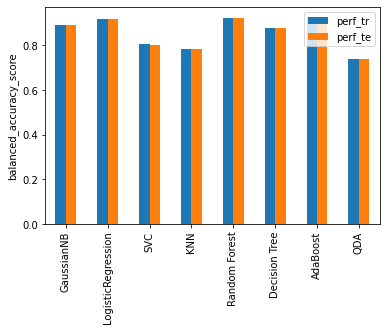

In [76]:
df_perf_one_hot[['perf_tr', 'perf_te']].plot.bar()
plt.ylabel(sklearn_metric.__name__)
plt.show()

<div class="alert alert-block alert-info"><b>Séparation des deux classes en fonction des colonnes</b></div>

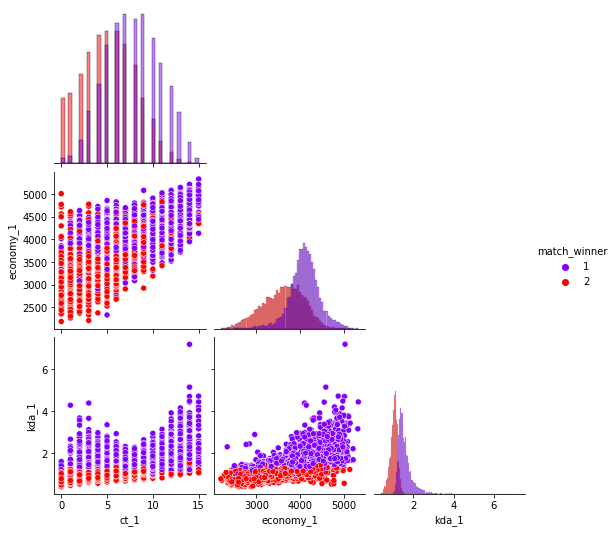

In [3]:
df_new = df_merge2[df_merge2.columns[[2,9,11,8]]]
g = sns.pairplot(df_new,hue="match_winner", diag_kind="hist",palette="rainbow",corner=True)

In [ ]:
"""
[‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, 
 ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’, ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, 
 ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’, ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, 
 ‘Pastel1_r’, ‘Pastel2’, ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, 
 ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, 
 ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, 
 ‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, 
 ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, 
 ‘YlOrRd_r’, ‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’, ‘bone’, 
 ‘bone_r’, ‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’, ‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’,
 ‘cubehelix’, ‘cubehelix_r’, ‘flag’, ‘flag_r’, ‘gist_earth’, ‘gist_earth_r’, ‘gist_gray’, ‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, ‘gist_ncar’, ‘gist_ncar_r’,
 ‘gist_rainbow’, ‘gist_rainbow_r’, ‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’, 
 ‘gist_yarg_r’, ‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, ‘gray’, ‘gray_r’,
 ‘hot’, ‘hot_r’, ‘hsv’, ‘hsv_r’, ‘icefire’, ‘icefire_r’, ‘inferno’, 
 ‘inferno_r’, ‘magma’, ‘magma_r’, ‘mako’, ‘mako_r’, 
 ‘nipy_spectral’, ‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, ‘pink’, ‘pink_r’,
 ‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’,
 ‘rocket’, ‘rocket_r’, ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’,
 ‘summer’, ‘summer_r’, ‘tab10’, ‘tab10_r’, ‘tab20’, ‘tab20_r’, ‘tab20b’,
 ‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’, ‘twilight’,
 ‘twilight_r’, ‘twilight_shifted’, ‘twilight_shifted_r’, ‘viridis’, ‘viridis_r’, ‘vlag’, ‘vlag_r’, ‘winter’, ‘winter_r’]
"""